## Setup

In [7]:
import os
import random

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
# import torch.nn.parallel
import torch.optim as optim
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.autograd as autograd
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

randomSeed=42
random.seed(randomSeed)
torch.manual_seed(randomSeed)



os.makedirs("creditcard_samples", exist_ok=True)

In [3]:
file_name = 'data/raw/creditcard.csv'
df = pd.read_csv(file_name)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
label_cols = [ i for i in df.columns if 'Class' in i ]
data_cols = [ i for i in df.columns if i not in label_cols ]

In [ ]:
# pip install dill
# import dill
# dill.dump_session('notebook_env.db')
# dill.load_session('notebook_env.db')

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [2]:
dataroot = os.path.join('data', '') # Path to the dataset folder.
!dir {dataroot}
# !ls {dataroot}
df = pd.read_feather(dataroot + 'df-raw')

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: 4AE9-3D68

 Verzeichnis von C:\Users\chinne\Documents\Projekt_Master\data

14.05.2019  18:52    <DIR>          .
14.05.2019  18:52    <DIR>          ..
11.05.2019  09:35    <DIR>          .ipynb_checkpoints
23.03.2018  02:17       150.828.752 creditcard.csv
10.05.2019  21:56        69.155.632 creditcardfraud.zip
14.05.2019  18:52        70.634.392 df-raw
               3 Datei(en),    290.618.776 Bytes
               3 Verzeichnis(se), 12.700.815.360 Bytes frei


In [3]:
df = df.drop('Time', axis =1)

In [115]:
class CreditcardDataset(Dataset):

    def __init__(self):
        xy = train.values
        self.len = xy.shape[0]
        self.features = torch.tensor(xy[:, 0:-1], dtype= torch.float32) 
        self.label = torch.tensor(xy[:, [-1]], dtype= torch.float32) 
        self.features.to(device)
        self.label.to(device)

    def __getitem__(self, index):
        return self.features[index], self.label[index]

    def __len__(self):
        return self.len

## Inputs

- **workers** - the number of worker threads for loading the data with the DataLoader
- **batch_size** - the batch size used in training. The DCGAN paper uses a batch size of 128
- **image_size** - the spatial size of the images used for training. This implementation defaults to 64x64. If another size is desired, the structures of D and G must be changed. See here for more details
- **nc** - number of color channels in the input images. For color images this is 3
- **nz** - length of latent vector
- **ngf** - relates to the depth of feature maps carried through the generator
- **ndf** - sets the depth of feature maps propagated through the discriminator
- **num_epochs** - number of training epochs to run. Training for longer will probably lead to better results but will also take much longer
- **lr** - learning rate for training. As described in the DCGAN paper, this number should be 0.0002
- **beta1** - beta1 hyperparameter for Adam optimizers. As described in paper, this number should be 0.5
- **ngpu** - number of GPUs available. If this is 0, code will run in CPU mode. If this number is greater than 0 it will run on that number of GPUs

## Training parameters

In [9]:
lr = 0.0002
batch_size = 128
num_epochs = 100
n_critic = 5

## Network parameters

In [10]:
Z_dim = 32
h_dim = 128# number of hidden neurons in our hidden layer
# Defining the parematers of the network
h_dim = 128    
Z_dim = 32     # dimension of the input noise for generator 
X_dim = 30

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5


In [11]:
# Number of workers for dataloader
workers = 2
# Batch size during training
batch_size = 128
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# Learning rate for optimizers
lr = 0.0002

# Number of channels in the training images. For color images this is 3
nc = 30
# Size of z latent vector (i.e. size of generator input)
nz = 32
# Size of feature maps in generator
ngf = 30
# Size of feature maps in discriminator
ndf = 1
# Number of training epochs
num_epochs = 20




In [12]:
# Decide which device we want to run on
device = 'cpu'

In [13]:
dataset = CreditcardDataset()

NameError: name 'CreditcardDataset' is not defined

In [123]:
dataset[1]

(tensor([-0.0155, -0.0191,  0.0072,  0.0162,  0.0099, -0.0080,  0.0026, -0.0006,
         -0.0025, -0.0077, -0.0041, -0.0050,  0.0068, -0.0177,  0.0219,  0.0076,
          0.0071,  0.0206,  0.0035,  0.0273,  0.0090,  0.0060,  0.0220, -0.0049,
          0.0054, -0.0030, -0.0063,  0.0011,  0.0176]), tensor([0.]))

In [17]:
train_Class = train[train.Class == 1]

In [15]:
from src.common.helperfunctions import *
from src.common.accuracy_XGboost import *

In [18]:
dataloader = prepareDataset(train_Class, batch_size = 128, device = 'cpu', withLabel = False)

In [19]:
dataloader.dataset.features.size()

torch.Size([394, 31])

In [20]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [25]:
randomNoise_dim = 32
hidden_dim=128
realData_dim=30

In [22]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, randomNoise_dim, hidden_dim, realData_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(randomNoise_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, hidden_dim*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim*2, hidden_dim*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim*4, realData_dim),
        )

    def forward(self, input):
        return self.main(input)

In [23]:
class Discriminator(nn.Module):
    '''
    This is the discriminator of the GAN
    '''
    def __init__(self, realData_dim, hidden_dim):
        '''
        Args:
            realData_dim: An integer indicating the real data dimension.
            hidden_dim: An integer indicating the size of the first hidden dimension.
        '''
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(realData_dim, hidden_dim*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim*4, hidden_dim*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim*2, hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, input):
        return self.main(input)

In [19]:
# Loss weight for gradient penalty
lambda_gp = 10

In [20]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(29, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [21]:
Tensor = torch.cuda.FloatTensor if device else torch.FloatTensor

In [3]:
def compute_gradient_penalty(D, real_samples, fake_samples, labels, X_dim):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha = torch.randn(real_samples.size(0), X_dim, device=device)
    # Get random interpolation between real and fake samples
# #     print(alpha.shape)
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
#     print(interpolates.shape)
    d_interpolates = D(interpolates, labels)
    fake = Variable(Tensor(real_samples.shape[0], 1).fill_(1.0), requires_grad=False)
    # Get gradient w.r.t. interpolates
    gradients = autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

In [28]:
from time import time


In [104]:
# Training Loop

# Lists to keep track of progress
G_losses = []
D_losses = []
batches_done = 0

print("Starting Training Loop...")
# For each epoch
start_time = time()
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader):
#         real_samples = data[0].to(device)
#         labels = data[1].to(device)
        optimizerD.zero_grad()
        b_size = real_samples.size(0)
        noise = torch.randn(b_size, Z_dim, device=device)
        
        fake_samples = netG(noise, labels)
        
        real_validity = netD(real_samples, labels)
        
        fake_validity = netD(fake_samples, labels)
        
        
        gradient_penalty = compute_gradient_penalty(netD, real_samples.data, fake_samples.data, labels, X_dim)
        
        d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) + lambda_gp * gradient_penalty
        d_loss.backward()
        optimizerD.step()

        optimizerG.zero_grad()
        
        if i % n_critic == 0:
            fake_samples = netG(noise, labels)
            fake_validity = netD(fake_samples, labels)
            
            g_loss = -torch.mean(fake_validity)
            g_loss.backward()
            optimizerG.step()
            if i % 50 == 0:
                print(
                        "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                        % (epoch, num_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
                    )
            G_losses.append(g_loss.item())
            D_losses.append(d_loss.item())
            
            batches_done += n_critic

        




end_time = time()
seconds_elapsed = end_time - start_time

Starting Training Loop...
[Epoch 0/20] [Batch 0/2226] [D loss: -2.195998] [G loss: -0.756563]
[Epoch 0/20] [Batch 50/2226] [D loss: -4.925990] [G loss: -3.144742]
[Epoch 0/20] [Batch 100/2226] [D loss: -2.511447] [G loss: -1.574016]
[Epoch 0/20] [Batch 150/2226] [D loss: -2.190970] [G loss: -2.070625]
[Epoch 0/20] [Batch 200/2226] [D loss: -2.465125] [G loss: -1.092160]
[Epoch 0/20] [Batch 250/2226] [D loss: -2.351145] [G loss: -1.459153]
[Epoch 0/20] [Batch 300/2226] [D loss: -3.307448] [G loss: -1.182869]
[Epoch 0/20] [Batch 350/2226] [D loss: -2.098640] [G loss: -1.114579]
[Epoch 0/20] [Batch 400/2226] [D loss: -1.867193] [G loss: -0.740939]
[Epoch 0/20] [Batch 450/2226] [D loss: -1.594926] [G loss: -0.759684]
[Epoch 0/20] [Batch 500/2226] [D loss: -1.885663] [G loss: -1.391260]
[Epoch 0/20] [Batch 550/2226] [D loss: -2.228050] [G loss: -1.208359]
[Epoch 0/20] [Batch 600/2226] [D loss: -2.622423] [G loss: -1.454089]
[Epoch 0/20] [Batch 650/2226] [D loss: -2.601033] [G loss: -1.03856

In [ ]:
df_G = pd.DataFrame(G_losses)
df_G.to_feather(df_G)

In [ ]:
df_G.tail()

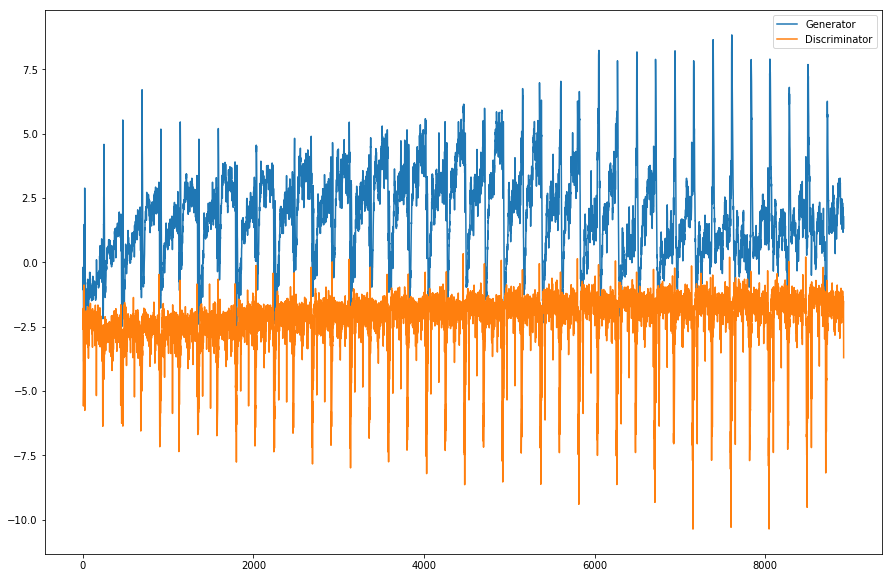

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(G_losses, label='Generator')
plt.plot(D_losses, label='Discriminator')
plt.savefig('fig1.png', dpi = 300)
plt.legend()
plt.show()

In [ ]:
rand_dim = 31 # 32 # needs to be ~data_dim
base_n_count = 128
nb_steps = 500 + 1
batch_size = 128

In [ ]:
img_list

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(opt.n_classes, opt.n_classes)

        def block(in_feat, out
                  _feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(opt.latent_dim + opt.n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(opt.n_classes, opt.n_classes)

        self.model = nn.Sequential(
            nn.Linear(opt.n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity



In [ ]:
# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()
